In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv('PFE_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2015-11-23 22:32:12,-0.3818,Politicians slam tax-avoiding Pfizer-Allergan ...,0.394,0.606,0.000,-1
2015-11-23 23:14:14,0.0000,U.S. Republican Trump calls Pfizer deal to mov...,0.000,1.000,0.000,0
2015-11-24 03:15:02,-0.3818,U.S. politicians slam tax-avoiding Pfizer-Alle...,0.342,0.658,0.000,-1
2015-11-24 03:15:02,0.0000,Pfizer to buy Allergan in $160 billion deal,0.000,1.000,0.000,0
2015-11-24 18:00:05,0.0000,"Pfizer, IIT-Delhi collaborate for healthcare i...",0.000,1.000,0.000,0
2016-02-02 14:48:58,-0.1280,Pfizer 2016 forecasts disappoint; shares fall,0.303,0.449,0.247,-1
2016-03-11 13:19:04,-0.4404,Medecins Sans Frontieres files to block Pfizer...,0.195,0.805,0.000,-1
2016-03-14 13:56:07,-0.5574,Delhi High Court stays government ban on Pfize...,0.247,0.753,0.000,-1
2016-03-15 02:34:23,0.1027,Delhi High Court grants Pfizer temporary relie...,0.217,0.482,0.301,1


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2015-11-23,-0.190900,0.197,0.803,0.0,-0.500000
2015-11-24,-0.127267,0.114,0.886,0.0,-0.333333
2015-11-25,0.000000,0.000,0.000,0.0,0.000000
2015-11-26,0.000000,0.000,0.000,0.0,0.000000
2015-11-27,0.000000,0.000,0.000,0.0,0.000000


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.5106,0.000,0.765,0.235,1.0
2016-07-02,0.0000,0.000,0.000,0.000,0.0
2016-07-03,0.0000,0.000,0.000,0.000,0.0
2016-07-04,-0.2960,0.196,0.804,0.000,-1.0
2016-07-05,0.2023,0.000,0.795,0.205,1.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.063377,0.037181,0.621874,0.076345,0.142582
std,0.156667,0.057773,0.382012,0.081356,0.338787
min,-0.718400,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.015935,0.000000,0.816278,0.067929,0.000000
75%,0.139042,0.060773,0.885308,0.119631,0.333333
max,0.765000,0.500000,1.000000,0.489500,1.000000


### Fundamental Data

In [52]:
fund = pd.read_csv('PFE_Fund.csv')
fund.head()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,01/07/2019,2.490000e+11,4.2415,21.7275,0.040125,0.046025,13767905637,24840905637,0.177442,-0.017161,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.2986
1,28/06/2019,2.470000e+11,4.1979,21.5041,0.040542,0.046503,13767905637,24840905637,0.177442,-0.017161,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.3185
2,27/06/2019,2.470000e+11,4.2085,21.5587,0.040439,0.046385,13767905637,24840905637,0.177442,-0.017161,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.3185
3,26/06/2019,2.450000e+11,4.1659,21.3403,0.040853,0.046860,13767905637,24840905637,0.177442,-0.017161,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.3185
4,25/06/2019,2.490000e+11,4.2405,21.7225,0.040134,0.046035,13767905637,24840905637,0.177442,-0.017161,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.3185


In [53]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [54]:

fund.index =fund['date']

In [55]:
#fund=fund.loc['2019-07-01':'2016-07-01']

In [56]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 35 columns):
date                              754 non-null datetime64[ns]
marketcap                         754 non-null float64
pricetobook                       754 non-null float64
pricetoearnings                   754 non-null float64
dividendyield                     754 non-null float64
earningsyield                     754 non-null float64
nopat                             754 non-null int64
freecashflow                      754 non-null int64
roe                               754 non-null float64
ebitdagrowth                      754 non-null float64
ebitdamargin                      754 non-null float64
cashdividendspershare             754 non-null float64
bookvaluepershare                 754 non-null float64
capex                             754 non-null int64
currentratio                      754 non-null float64
debttoequity                      754 non-null flo

### Price analysis

In [57]:
df_price = pd.read_csv('pfizer_price.csv')

In [58]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [59]:
#df_price = df_price.drop(['date'], axis=1)

In [60]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-07,0,36.58,36.785,35.86,36.65,30376864.0,36.58,2019-08-07,daily,36.785,False,35.86,36.65,30376864.0
2019-08-06,1,36.95,37.310,36.47,37.19,30347061.0,36.95,2019-08-06,daily,37.310,False,36.47,37.19,30347061.0
2019-08-05,2,36.96,37.830,36.41,37.76,43671852.0,36.96,2019-08-05,daily,37.830,False,36.41,37.76,43671852.0
2019-08-02,3,38.00,38.540,37.75,38.25,27659958.0,38.00,2019-08-02,daily,38.540,False,37.75,38.25,27659958.0
2019-08-01,4,38.25,38.620,37.68,38.31,48979979.0,38.25,2019-08-01,daily,38.620,False,37.68,38.31,48979979.0


In [61]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2019-08-07 to 2014-10-30
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [62]:
df_price=df_price.loc['2019-07-01':'2016-07-01']

In [63]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-07-01,26,43.364305,43.473285,42.933337,43.106715,20261720.0,43.77,2019-07-01,daily,43.880,False,43.335,43.51,20261720.0
2019-06-28,27,42.918476,43.309815,42.576674,43.047271,37690857.0,43.32,2019-06-28,daily,43.715,False,42.975,43.45,37690857.0
2019-06-27,28,43.027456,43.156251,42.611349,42.621256,20868067.0,43.43,2019-06-27,daily,43.560,False,43.010,43.02,20868067.0
2019-06-26,29,42.591535,43.394027,42.106076,43.275139,38908279.0,42.99,2019-06-26,daily,43.800,False,42.500,43.68,38908279.0
2019-06-25,30,43.354398,43.879485,43.354398,43.443563,26972684.0,43.76,2019-06-25,daily,44.290,False,43.760,43.85,26972684.0


In [64]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [65]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [66]:
df_price.index =df_price['date']

In [67]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,26,43.364305,43.473285,42.933337,43.106715,20261720.0,43.77,2019-07-01,daily,43.880,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.2986
2019-06-28,27,42.918476,43.309815,42.576674,43.047271,37690857.0,43.32,2019-06-28,daily,43.715,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.3185
2019-06-27,28,43.027456,43.156251,42.611349,42.621256,20868067.0,43.43,2019-06-27,daily,43.560,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.3185
2019-06-26,29,42.591535,43.394027,42.106076,43.275139,38908279.0,42.99,2019-06-26,daily,43.800,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.3185
2019-06-25,30,43.354398,43.879485,43.354398,43.443563,26972684.0,43.76,2019-06-25,daily,44.290,...,18442000000,1.550000e+11,9.626300e+10,45143000000,11507000000,11507000000,2408000000,-18188000000,2859000000,0.3185


In [68]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2019-07-01     26
2019-06-28     27
2019-06-27     28
2019-06-26     29
2019-06-25     30
2019-06-24     31
2019-06-21     32
2019-06-20     33
2019-06-19     34
2019-06-18     35
2019-06-17     36
2019-06-14     37
2019-06-13     38
2019-06-12     39
2019-06-11     40
2019-06-10     41
2019-06-07     42
2019-06-06     43
2019-06-05     44
2019-06-04     45
2019-06-03     46
2019-05-31     47
2019-05-30     48
2019-05-29     49
2019-05-28     50
2019-05-24     51
2019-05-23     52
2019-05-22     53
2019-05-21     54
2019-05-20     55
             ... 
2016-08-12    750
2016-08-11    751
2016-08-10    752
2016-08-09    753
2016-08-08    754
2016-08-05    755
2016-08-04    756
2016-08-03    757
2016-08-02    758
2016-08-01    759
2016-07-29    760
2016-07-28    761
2016-07-27    762
2016-07-26    763
2016-07-25    764
2016-07-22    765
2016-07-21    766
2016-07-20    767
2016-07-19    768
2016-07-18    769
2016-07-15    770
2016-07-14    771
2016-07-13  

In [69]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 49 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
compound                          754 non-null float64
marketcap                         754 non-null flo

In [70]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [71]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [72]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
        'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [73]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [74]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 49 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
compound                          754 non-null float64
marketcap                         754 non-null flo

### EDA

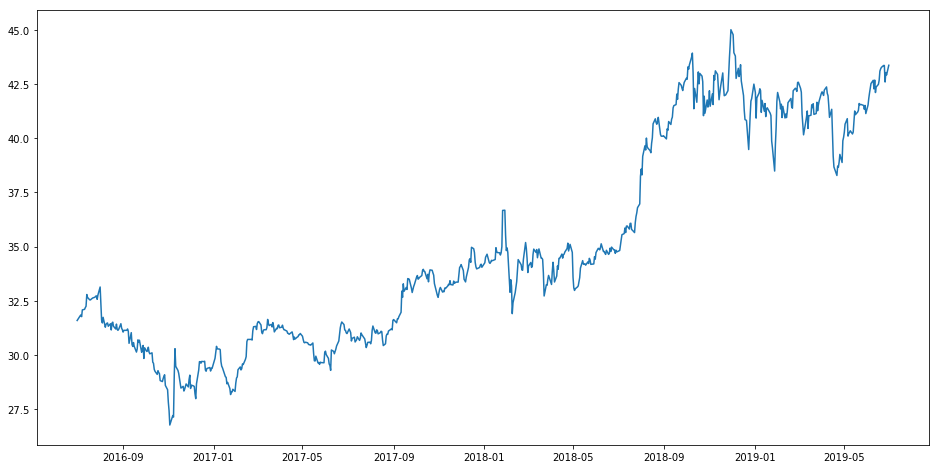

In [75]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

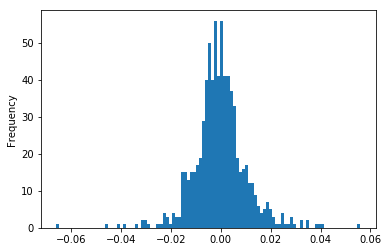

In [76]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

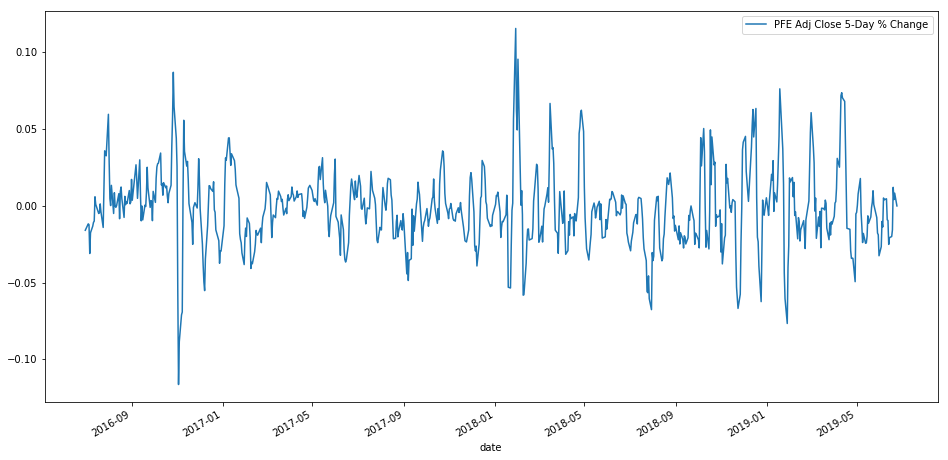

In [77]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='PFE Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.190405
5d_close_future_pct     -0.190405             1.000000


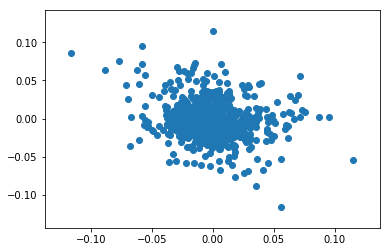

In [78]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.007357
5d_close_future_pct -0.007357             1.000000


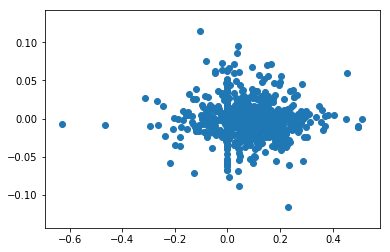

In [79]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

In [80]:
import talib

In [81]:
MACD = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
STOCH = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

In [82]:
data = [MACD, STOCH]
df = pd.DataFrame(data)

In [83]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

#df_price['MACD'] = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
    
#df_price['STOCH'] = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [84]:
df1 = df_price.copy()

In [85]:
#df1.join(df123['compound'],how='right')

In [86]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                5d_close_future_pct  5d_close_pct      ma14  \
5d_close_future_pct                        1.000000     -0.175278  0.169116   
5d_close_pct                              -0.175278      1.000000 -0.848678   
ma14                                       0.169116     -0.848678  1.000000   
rsi14                                     -0.088939      0.624342 -0.817542   
ma30                                       0.136974     -0.644823  0.860462   
rsi30                                     -0.083015      0.491913 -0.677298   
ma50                                       0.084263     -0.534342  0.735066   
rsi50                                     -0.096810      0.425885 -0.593430   
ma200                                      0.117544     -0.302628  0.425666   
rsi200                                    -0.157541      0.295355 -0.406485   
compound                                  -0.022168      0.081611 -0.107000   
marketcap                                 -0.267637 

In [87]:
# Check for multicollinearity
columns = list(feat_targ_df.columns)
columns.remove('5d_close_future_pct')
number_of_columns_to_delete = 0

# We loop over all features
for i in range(len(columns)):
    column_i = columns[i]
    
   
    for j in range(i+1, len(columns)):
        column_j = columns[j]
        
        # Use .corr to detect correlation between the two features selected
        correlation = feat_targ_df[column_i].corr(feat_targ_df[column_j])
        
        # if correlation is higher than 0.9, a statement prints the correlation value
        if (column_i != column_j) and (correlation > 0.75):
            number_of_columns_to_delete = number_of_columns_to_delete + 1
            print(column_i +" is highly correlated with " + column_j + " with a correlation score of: {0:.4}".format(correlation))
            
if number_of_columns_to_delete == 0:
    print("No major correlation detected.")

ma14 is highly correlated with ma30 with a correlation score of: 0.8605
rsi14 is highly correlated with rsi30 with a correlation score of: 0.9384
rsi14 is highly correlated with rsi50 with a correlation score of: 0.8547
ma30 is highly correlated with ma50 with a correlation score of: 0.9379
rsi30 is highly correlated with rsi50 with a correlation score of: 0.9758
rsi30 is highly correlated with rsi200 with a correlation score of: 0.7595
rsi50 is highly correlated with rsi200 with a correlation score of: 0.8613
marketcap is highly correlated with nopat with a correlation score of: 0.7668
marketcap is highly correlated with roe with a correlation score of: 0.8114
marketcap is highly correlated with ebitdamargin with a correlation score of: 0.778
marketcap is highly correlated with bookvaluepershare with a correlation score of: 0.7715
marketcap is highly correlated with epsgrowth with a correlation score of: 0.7687
marketcap is highly correlated with netincomegrowth with a correlation sco

In [118]:
feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']






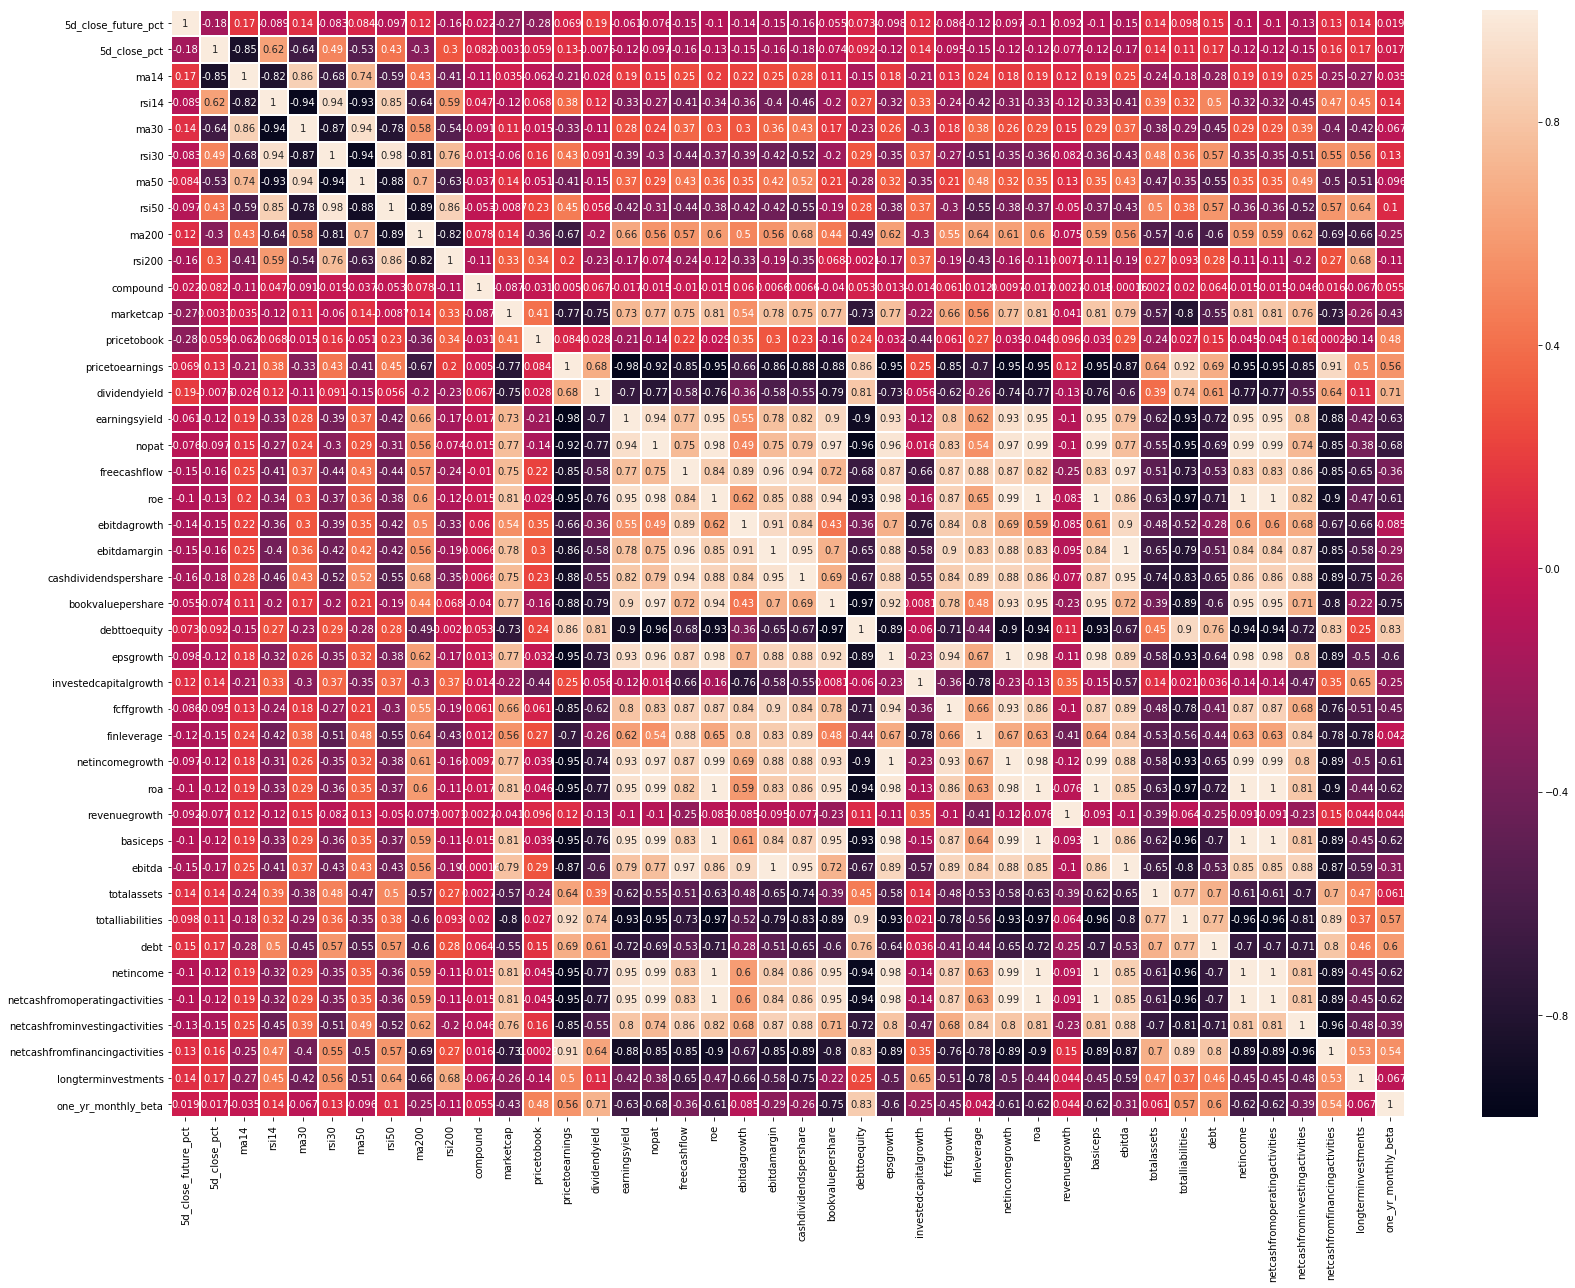

<Figure size 432x288 with 0 Axes>

In [89]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=7):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [91]:
calculate_vif_(train_features,thresh=7)

dropping 'roe' at index: 18
Remaining variables:
Index(['const', '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'debttoequity', 'epsgrowth',
       'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth',
       'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets',
       'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta'],
      dtype='object')


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,const,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2018-09-12,1.0,-0.019649,1.026459,36.997899,1.036336,44.934249,1.032711,47.147454,1.018329,48.554899,...,1.946300e+10,1.650000e+11,9.485600e+10,4.051800e+10,2.259600e+10,2.259600e+10,4.230000e+08,-1.808200e+10,6.595000e+09,0.7611
2018-09-11,1.0,-0.027580,1.025577,36.239486,1.037375,44.590980,1.034416,46.941615,1.020486,48.498040,...,1.946300e+10,1.650000e+11,9.485600e+10,4.051800e+10,2.259600e+10,2.259600e+10,4.230000e+08,-1.808200e+10,6.595000e+09,0.7611
2018-09-10,1.0,-0.022088,1.028259,34.344068,1.041710,43.727066,1.039394,46.424567,1.026256,48.355765,...,1.946300e+10,1.650000e+11,9.485600e+10,4.051800e+10,2.259600e+10,2.259600e+10,4.230000e+08,-1.808200e+10,6.595000e+09,0.7611
2018-09-07,1.0,-0.017691,1.021970,36.351693,1.036438,44.351645,1.035166,46.759668,1.022628,48.440893,...,1.946300e+10,1.650000e+11,9.485600e+10,4.051800e+10,2.259600e+10,2.259600e+10,4.230000e+08,-1.808200e+10,6.595000e+09,0.7611
2018-09-06,1.0,-0.024971,1.028995,33.083375,1.045085,42.874802,1.044728,45.881172,1.032538,48.201335,...,1.946300e+10,1.650000e+11,9.485600e+10,4.051800e+10,2.259600e+10,2.259600e+10,4.230000e+08,-1.808200e+10,6.595000e+09,0.7611
2018-09-05,1.0,-0.013204,1.023963,34.146085,1.041171,43.200892,1.042316,46.053539,1.030449,48.244208,...,1.946300e+10,1.650000e+11,9.485600e+10,4.051800e+10,2.259600e+10,2.259600e+10,4.230000e+08,-1.808200e+10,6.595000e+09,0.7611
2018-09-04,1.0,-0.022217,1.031424,30.561911,1.051188,41.519649,1.053208,45.049586,1.041992,47.970580,...,1.946300e+10,1.650000e+11,9.485600e+10,4.051800e+10,2.259600e+10,2.259600e+10,4.230000e+08,-1.808200e+10,6.595000e+09,0.7611
2018-08-31,1.0,-0.012839,1.023328,32.931123,1.046106,42.246242,1.047991,45.428933,1.037843,48.063096,...,1.946300e+10,1.650000e+11,9.485600e+10,4.051800e+10,2.259600e+10,2.259600e+10,4.230000e+08,-1.808200e+10,6.595000e+09,0.7611
2018-08-30,1.0,-0.016588,1.019948,32.770572,1.044779,42.173967,1.046992,45.386304,1.037968,48.051646,...,1.946300e+10,1.650000e+11,9.485600e+10,4.051800e+10,2.259600e+10,2.259600e+10,4.230000e+08,-1.808200e+10,6.595000e+09,0.7611


In [92]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_features.values, i) for i in range(train_features.shape[1])]
vif["features"] = train_features.columns

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [93]:
vif.round(1)

,VIF Factor,features
0,0.000000e+00,const
1,4.600000e+00,5d_close_pct
2,1.290000e+01,ma14
3,1.839000e+02,rsi14
4,3.680000e+01,ma30
5,2.193900e+03,rsi30
6,7.530000e+01,ma50
7,2.432200e+03,rsi50
8,1.536000e+02,ma200
9,9.084000e+02,rsi200


In [88]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(549, 42) (439, 42) (110, 42)
(549, 42) (439, 42) (110, 42)


In [94]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.270
Model:                             OLS   Adj. R-squared:                  0.235
Method:                  Least Squares   F-statistic:                     7.711
Date:                 Thu, 08 Aug 2019   Prob (F-statistic):           6.87e-19
Time:                         19:09:55   Log-Likelihood:                 1128.3
No. Observations:                  439   AIC:                            -2215.
Df Residuals:                      418   BIC:                            -2129.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

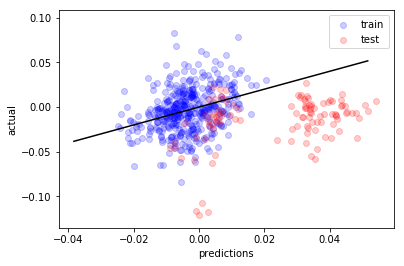

In [124]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [95]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [96]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.2694271526094787
-7.864275562846602e+24


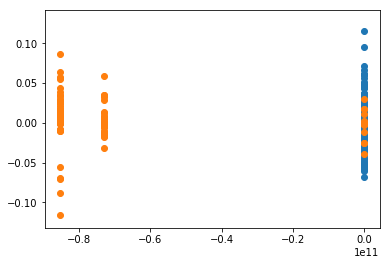

In [97]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(549, 42) (439, 42) (110, 42)
(549, 42) (439, 42) (110, 42)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [100]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [101]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

-7.304290196042824e+21
-3.497106305646098e+21


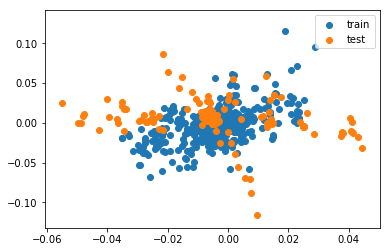

In [102]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Feature Engineering

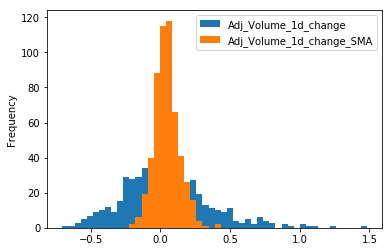

In [103]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'] # +['MACD','STOCH']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)
#df_price['MACD'] = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
#df_price['STOCH'] = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)


# Plot histogram of volume % change data
df_price[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [104]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(df_price.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original DataFrame index for merging
days_of_week.index = df_price.index

# Join the dataframe with the days of week DataFrame
df_price = pd.concat([df_price, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
df_price.dropna(inplace=True)  # drop missing values in-place
print(df_price.head())

            Unnamed: 0  adj_close   adj_high    adj_low   adj_open  \
date                                                                 
2018-09-05         231  40.429789  40.497414  39.859811  39.888793   
2018-09-04         232  39.966078  40.139970  39.821169  40.072345   
2018-08-31         233  40.110988  40.164121  39.695580  39.888793   
2018-08-30         234  40.091667  40.482923  39.801847  39.830829   
2018-08-29         235  40.091667  40.202764  39.772865  40.091667   

            adj_volume  close       date frequency    high    ...      \
date                                                          ...       
2018-09-05  20702043.0  41.85 2018-09-05     daily  41.920    ...       
2018-09-04  14492231.0  41.37 2018-09-04     daily  41.550    ...       
2018-08-31  19908467.0  41.52 2018-08-31     daily  41.575    ...       
2018-08-30  15194858.0  41.50 2018-08-30     daily  41.905    ...       
2018-08-29  14976323.0  41.50 2018-08-29     daily  41.615    ...      

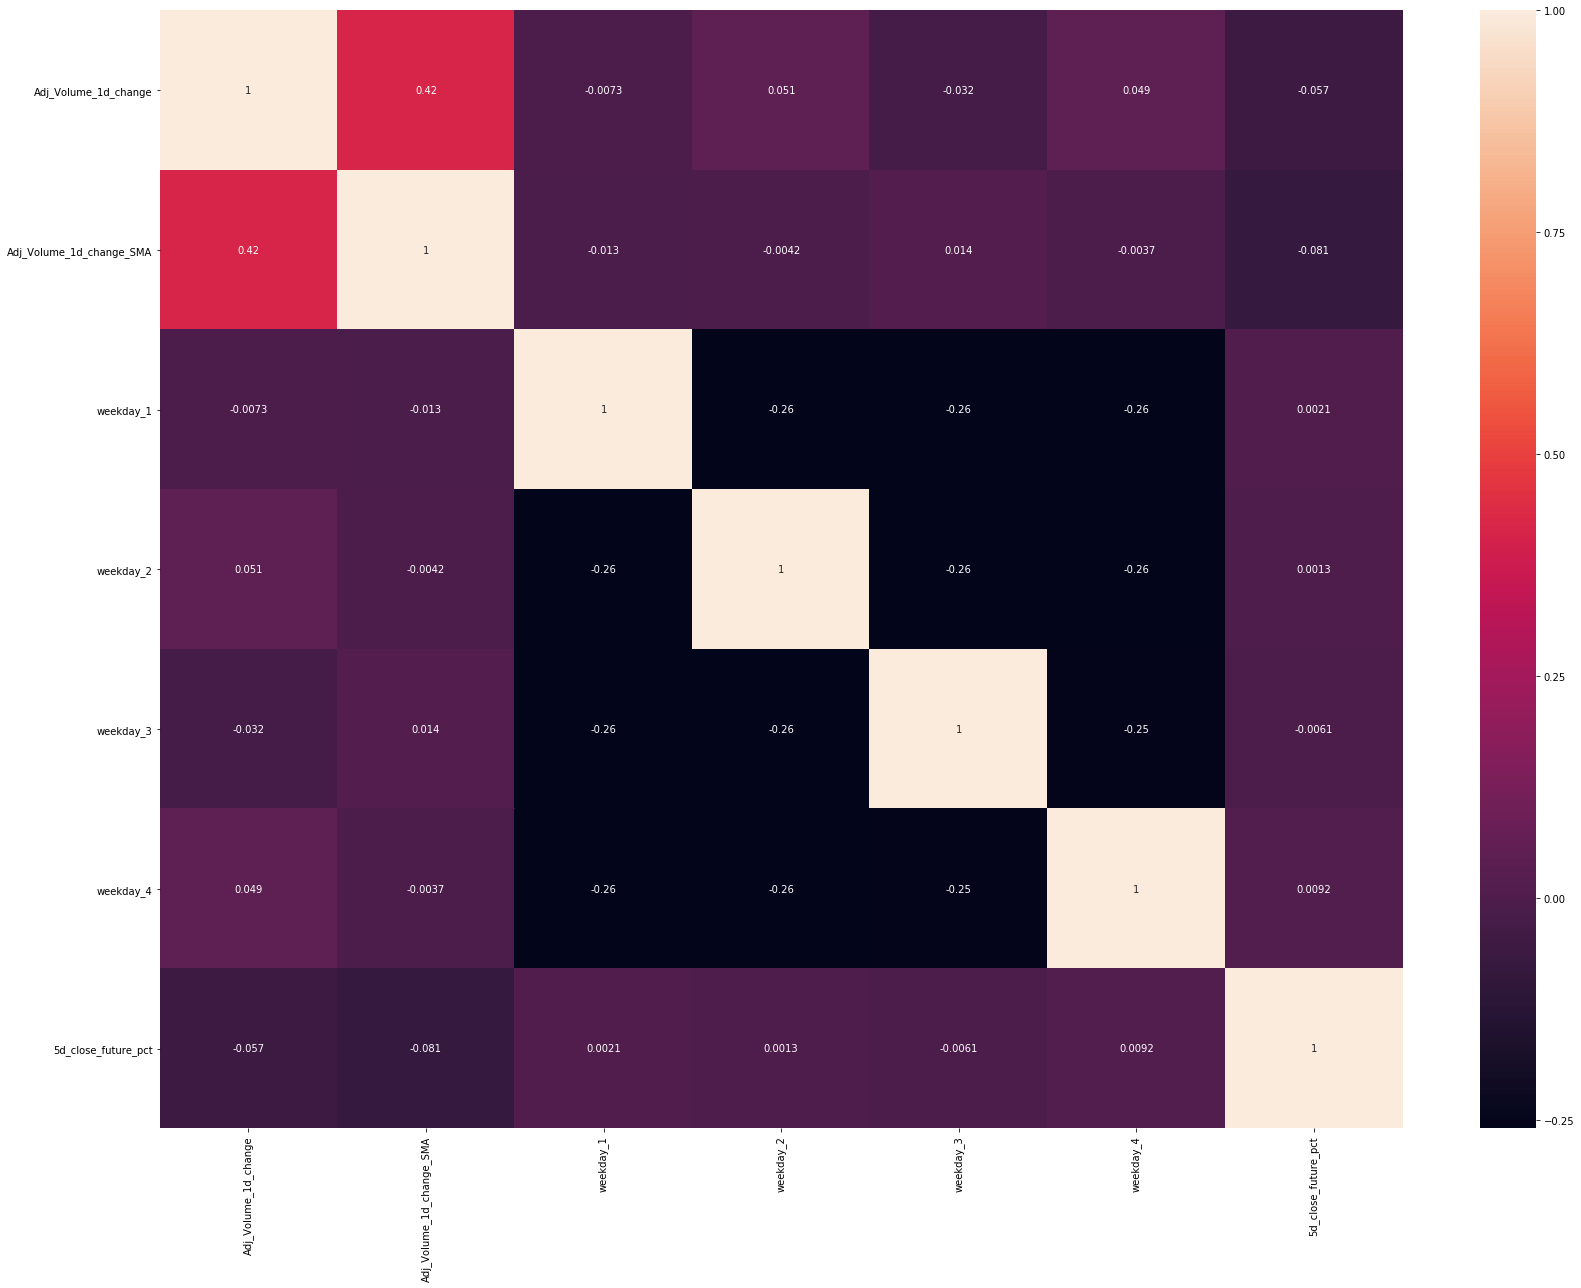

In [105]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])
plt.figure(figsize=(24, 18))
# Plot the correlations between the new features and the targets
sns.heatmap(df_price[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

### Decision Tree

In [106]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999799723385705
-1.5199159083212095


In [107]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999799723385705
-0.2456289566060652


In [108]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.402016343472254
-0.8142264756147638 

max_depth= 5
0.5745170003854612
-1.2577347253467264 

max_depth= 10
0.8949041854670272
-1.6011552208797406 



In [109]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-2.0748075895814138
-0.2196523623313622 

max_depth= 5
-3.6264527499475365
-0.8437079996315285 

max_depth= 10
-3.8728567218094723
-1.2387449472851277 



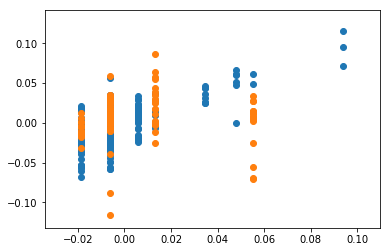

In [110]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9348781975791505
-0.7496380384191828


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [112]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.043979376316153895 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [113]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.3475131607079588
0.043979376316153895


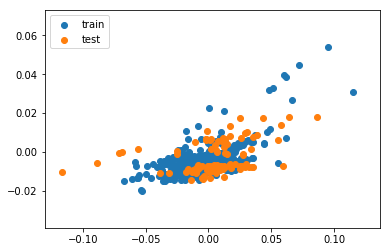

In [114]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

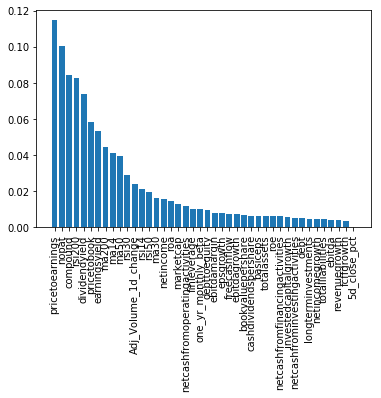

In [115]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.43206527751820656
-0.0643455202812937


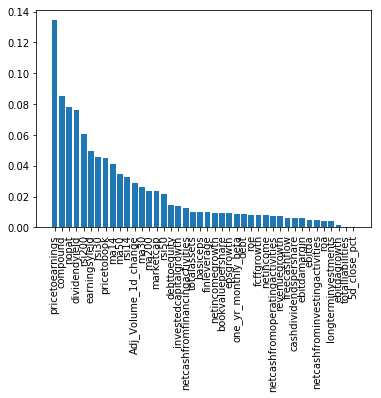

In [117]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


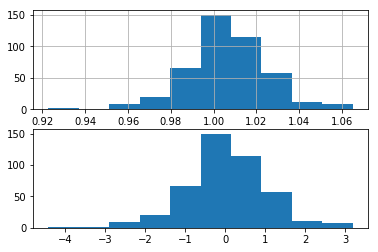

In [118]:


# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [119]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.8012165902376933
0.03239720446714833

n_neighbors = 3
train, test scores
0.7170587745715451
0.0683212889240441

n_neighbors = 4
train, test scores
0.62196061365748
0.10164477462153931

n_neighbors = 5
train, test scores
0.5333935395456089
0.11099156959152379

n_neighbors = 6
train, test scores
0.4984253193946445
0.10340894277643442

n_neighbors = 7
train, test scores
0.47110283622950855
0.10130937239622773

n_neighbors = 8
train, test scores
0.43049078090196685
0.10365169728998004

n_neighbors = 9
train, test scores
0.40739021273978204
0.08656631707524975

n_neighbors = 10
train, test scores
0.3880590178103974
0.07861090083323696

n_neighbors = 11
train, test scores
0.3694706935445866
0.08507535910591968

n_neighbors = 12
train, test scores
0.3492588324046674
0.08211723129372406

n_neighbors = 13
train, test scores
0.32881723086517045
0.07562631753399651

n_neighbors = 14
train, test scores
0.31620539403956127
0.06905175582642376

n_neighbors = 15
t

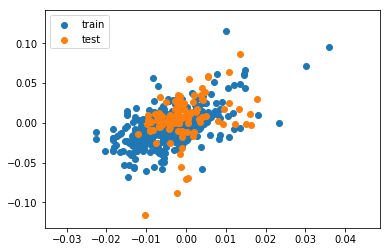

In [120]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [121]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
439/439 [==============================] - 0s 371us/step - loss: 0.3241
Epoch 2/25
439/439 [==============================] - 0s 26us/step - loss: 0.0448
Epoch 3/25
439/439 [==============================] - 0s 24us/step - loss: 0.0195
Epoch 4/25
439/439 [==============================] - 0s 24us/step - loss: 0.0086
Epoch 5/25
439/439 [==============================] - 0s 32us/step - loss: 0.0046
Epoch 6/25
439/439 [==============================] - 0s 27us/step - loss: 0.0031
Epoch 7/25
439/439 [==============================] - 0s 29us/step - loss: 0.0024
Epoch 8/25
439/439 [==============================] - 0s 29us/step - loss: 0.0019
Epoch 9/25
439/439 [==============================] - 0s 28us/step - loss: 0.0016
Epoch 10/25
439/439 [==============================] - 0s 23us/step - loss: 0.0015
Epoch 11/25
439/439 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 12/25
439/439 [==============================] - 0s 23us/step - loss: 0.0012
Epoch 13/25


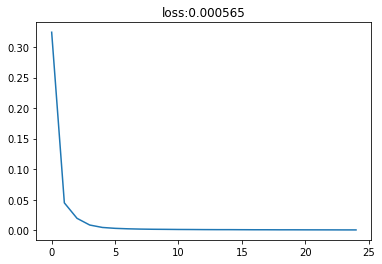

In [122]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-0.1607677028643688
-129.46676309553493


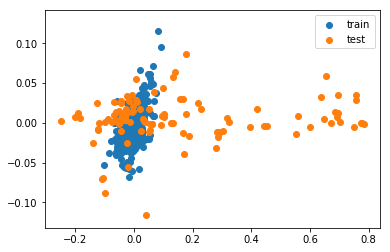

In [123]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [124]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c35db49d8>


Epoch 1/25
439/439 [==============================] - 0s 385us/step - loss: 1.6945
Epoch 2/25
439/439 [==============================] - 0s 24us/step - loss: 0.4023
Epoch 3/25
439/439 [==============================] - 0s 22us/step - loss: 0.1959
Epoch 4/25
439/439 [==============================] - 0s 34us/step - loss: 0.1251
Epoch 5/25
439/439 [==============================] - 0s 26us/step - loss: 0.1067
Epoch 6/25
439/439 [==============================] - 0s 29us/step - loss: 0.0936
Epoch 7/25
439/439 [==============================] - 0s 29us/step - loss: 0.0659
Epoch 8/25
439/439 [==============================] - 0s 27us/step - loss: 0.0512
Epoch 9/25
439/439 [==============================] - 0s 27us/step - loss: 0.0428
Epoch 10/25
439/439 [==============================] - 0s 27us/step - loss: 0.0306
Epoch 11/25
439/439 [==============================] - 0s 32us/step - loss: 0.0232
Epoch 12/25
439/439 [==============================] - 0s 27us/step - loss: 0.0264
Epoch 13/25


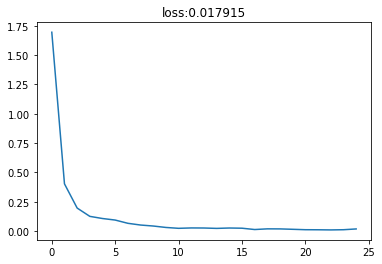

In [125]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-2.4512467961098867
-85.82990144265196


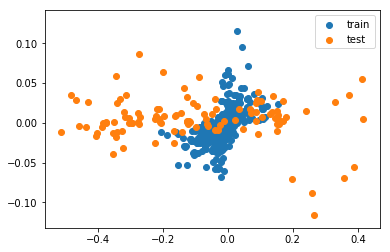

In [126]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
439/439 [==============================] - 0s 488us/step - loss: 0.1610
Epoch 2/25
439/439 [==============================] - 0s 41us/step - loss: 0.0950
Epoch 3/25
439/439 [==============================] - 0s 30us/step - loss: 0.0600
Epoch 4/25
439/439 [==============================] - 0s 28us/step - loss: 0.0414
Epoch 5/25
439/439 [==============================] - 0s 34us/step - loss: 0.0329
Epoch 6/25
439/439 [==============================] - 0s 30us/step - loss: 0.0270
Epoch 7/25
439/439 [==============================] - 0s 35us/step - loss: 0.0217
Epoch 8/25
439/439 [==============================] - 0s 31us/step - loss: 0.0195
Epoch 9/25
439/439 [==============================] - 0s 32us/step - loss: 0.0158
Epoch 10/25
439/439 [==============================] - 0s 31us/step - loss: 0.0135
Epoch 11/25
439/439 [==============================] - 0s 31us/step - loss: 0.0129
Epoch 12/25
439/439 [==============================] - 0s 34us/step - loss: 0.0113
Epoch 13/25


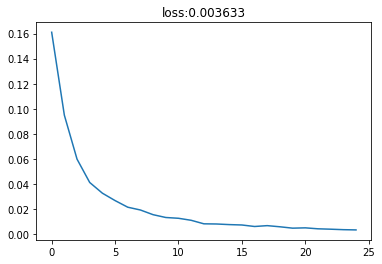

In [127]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [128]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[-0.00127574  0.00254332 -0.03779308 -0.07357634 -0.02181402]


0.1681574314803429
-19.10869421035712


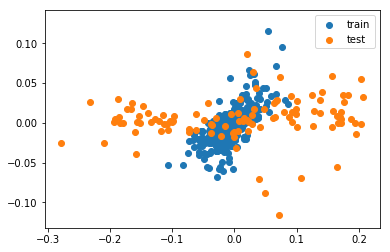

In [129]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()